# Support Vector Regression (Buildings)
____

#### Libraries
____

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Load dataset
___

In [12]:
dataset = '../../data/commercial_data_clear.csv'
columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'site_eui', 'ngas', 'water_use', 'total_fuel']


df = pd.read_csv(dataset, sep=',', usecols=columns)

cond1 = df['ptype'] == 'K-12 School'

building = df[cond1]

building.head(5)

,ptype,floor_area,build_year,occupy,star,site_eui,ngas,water_use,total_fuel
244,K-12 School,322505.0,1928,100,49.000000,75.9,2904463.4,15917.984063,1.158455e+07
281,K-12 School,36500.0,1947,100,59.854594,46.6,874188.3,15917.984063,3.976671e+06
1199,K-12 School,214783.0,1928,80,67.000000,75.7,6542200.2,2490.300000,3.976671e+06
1624,K-12 School,90600.0,1988,100,29.000000,90.2,6003028.0,4870.300000,3.976671e+06
2227,K-12 School,71000.0,2001,100,34.000000,90.5,2457100.8,1430.200000,3.976671e+06


In [13]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 244 to 11725
Data columns (total 9 columns):
ptype         90 non-null object
floor_area    90 non-null float64
build_year    90 non-null int64
occupy        90 non-null int64
star          90 non-null float64
site_eui      90 non-null float64
ngas          90 non-null float64
water_use     90 non-null float64
total_fuel    90 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.0+ KB


In [14]:
building.describe()

,floor_area,build_year,occupy,star,site_eui,ngas,water_use,total_fuel
count,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,9.000000e+01
mean,113176.088889,1957.888889,99.555556,62.010913,72.422700,5.771013e+06,10683.206171,3.603263e+06
std,78845.820415,31.526498,2.445409,30.407385,45.616365,1.060378e+07,7560.418928,1.647142e+06
min,36500.000000,1891.000000,80.000000,1.000000,2.900000,6.290900e+03,109.400000,0.000000e+00
25%,63950.000000,1929.250000,100.000000,40.000000,46.625000,1.015279e+06,1849.975000,3.976671e+06
50%,86618.000000,1961.500000,100.000000,67.500000,62.250000,2.547472e+06,15917.984063,3.976671e+06
75%,124815.000000,1972.750000,100.000000,89.500000,77.850000,4.555968e+06,15917.984063,3.976671e+06
max,444000.000000,2016.000000,100.000000,100.000000,280.071484,5.048545e+07,33570.600000,1.158455e+07


#### Data cleanup
___

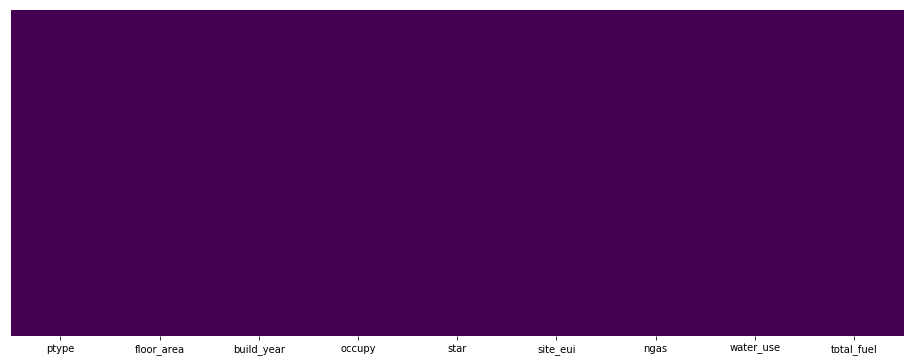

In [15]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Define X, Y variables
___

In [16]:
x_columns = ['floor_area', 'build_year', 'occupy', 'star', 'ngas', 'water_use', 'total_fuel']
y_columns = ['site_eui']

X = building[x_columns].values
Y = building[y_columns].values

#### Feature Scaling
___

In [17]:
scale_X = StandardScaler()
scale_Y = StandardScaler()

X = scale_X.fit_transform(X)

Y = Y.reshape(len(Y), 1)
Y = scale_Y.fit_transform(Y)

#### Split dataset (TRAIN/TEST) data
____

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### Fitting SVR to the dataset
____

In [20]:
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Fitting Simple Linear Regression to the Training Set
_____

In [21]:
y_prediction = regressor.predict(X_test)

#y_pred = scale_Y.inverse_transform(regressor.predict(scale_X.transform(np.array([[6.5]]))))  # original values without scale
#print(y_pred)

#### Real x Predict
_____

In [31]:
pd.DataFrame({
    'Real' : Y_test[:,0],
    'Predict' : y_prediction

})

,Real,Predict
0,0.072247,0.172059
1,-0.478872,-0.480498
2,-0.637594,-0.410993
3,-0.320150,-0.220233
4,-0.567051,-0.466725
5,-0.064430,-0.164572
6,0.125155,-0.074038
7,-0.234175,-0.177585
8,-0.622163,-0.521832
9,-0.388488,-0.451163


#### Model Score
__________

In [67]:
print(f"Training Data Score: {regressor.score(X_train, Y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, Y_test)}")

Training Data Score: 0.5573281150662568
Testing Data Score: 0.7679320674457418


#### GridSearch
__________

In [84]:
param_grid = [{'C': [0.1, 1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C': [0.1, 1, 10, 100, 1000], 'kernel' : ['poly']},
              {'C': [0.1, 1, 10, 100, 1000], 'kernel' : ['sigmoid']},
              {'C': [0.1, 1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.5, 0.1, 0.01, 0.001, 0.0001]}
             ]

grid = GridSearchCV(estimator = regressor, 
                    param_grid = param_grid,                    
                    cv = 10,
                    refit=True,
                    verbose=0)

grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly']}, {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['sigmoid']}, {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best Results
__________

In [85]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [86]:
grid.best_score_

0.27842630783433314